# Ensambles

# Comparando la performance de los árboles de decisión y ensambles de modelos
 
Ahora vamos a inicializar el clasificador de árbol de decisión, evaluar su rendimiento y compararlo con la perfomance de los ensambles que hemos visto hasta aquí. Para ello, vamos a usar los siguientes métodos:

### RandomForestClassifier()

Este método implementa y ejectua un RandomForest para resolver un problema de clasificación. Algunos de los parámetros más importantes son los siguientes:

* `n_estimators`: el número de iteraciones (o sea, de `base_estimators`) para entrenar
* `criterion`: define el criterio de impureza para evaluar la calidad de las particiones (por defecto, es `gini`) 
* `max_features`: la cantidad de features que extraerá para entrenar cada `base_estimator`. Por default es igual a `sqrt(X.shape[1])`
* `bootstrap` y `bootstrap_features`: controla si tanto los n_samples como las features son extraidos con reposición.
* `max_depth`: la pronfundidad máxima del árbol
* `min_samples_leaf`: el número mínimo de n_samples para constituir una hoja del árbol (nodo terminal)
* `min_samples_split`: el número mínimo de n_samples para realizar un split.

y varios otros que pueden llegar a ser importantes al momento de realizar el tunning. En general, los más importantes suelen ser: `n_estimators`, `max_features`, `max_depth` y `min_samples_leaf`.


### ExtraTreesClassifier()

Con este método se puede estimar un conjunto de conjuntos de árboles de decisión randomizados. Toma los mismos parámetros que `RandomForestClassifier()`.


### BaggingClassifier()

Este método es muy interesante porque, a diferencia de los anteriores, es un "meta estimador", está situado en nivel de abstracción mayor. Es decir, que permite implementar el algoritmo de bagging (para clasificación) con casi cualquier estimador de Scikit-Learn. Toma como parámetros análogos a los dos métodos anteriores (con diferentes valores por defecto en algunos casos). Los únicos "nuevos" son: 

* `base_estimator`: el estimador sobre el cual queremos correr el bagging (regresiones, árboles, etc...)
* `max_samples`: la cantidad de n_samples que muestrea en cada iteración. Por default es igual a `sqrt(X.shape[0])`


Para comparar los diferentes algoritmos armamos la siguiente función. Toma como input un estimador y un string con el nombre que le quieran poner, y ejecuta un `cross_val_score`

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report, precision_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
8223,0.71,0.69,3,274,3,0,0,0,support,medium
9192,0.40,0.42,3,146,2,1,0,0,hr,medium
4813,0.72,0.92,3,225,3,0,0,0,management,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
7481,0.44,0.58,2,157,2,0,0,0,sales,low
2347,0.69,0.89,4,174,2,0,0,0,technical,low
11931,0.80,0.93,3,225,4,0,0,0,product_mng,low
8784,0.78,0.60,2,206,2,0,0,0,marketing,low
14930,0.11,0.89,6,268,4,0,1,0,IT,medium
11601,0.53,0.66,3,191,3,0,0,0,IT,high


In [4]:
df.left.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [35]:
train_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
              'time_spend_company', 'Work_accident', 'promotion_last_5years']
X = df[train_cols]
y = df['left']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [40]:
from sklearn.model_selection import cross_val_score,StratifiedKFold, KFold
cv = KFold(n_splits=3, random_state=41, shuffle=True)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, RandomForestRegressor

In [38]:
def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X_train, y_train, cv=cv, n_jobs=-1,scoring='precision')
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))


In [ ]:
[1k, 1k ,1k] 3k
[[1k , 1k], 1k]
[1k , [1k, 1k]]
[[1k] , 1k, [1k]]


In [41]:
clf = LogisticRegression(C=1e10)
dt = DecisionTreeClassifier(class_weight='balanced')
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced',)
et = ExtraTreesClassifier(class_weight='balanced')


#evaluar_rendimiento(clf,  "Regresión Lógistica")
evaluar_rendimiento(dt,  "Árbol de decisión")
evaluar_rendimiento(bdt, "Bagging AD")
evaluar_rendimiento(rf,  "Random Forest")
evaluar_rendimiento(et,  "Extra Trees")

Rendimiento de Árbol de decisión:	0.939 ± 0.002
Rendimiento de Bagging AD:	0.984 ± 0.005
Rendimiento de Random Forest:	0.992 ± 0.002
Rendimiento de Extra Trees:	0.987 ± 0.003


In [44]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [46]:
rf_pred = rf.predict(X_train)
print(accuracy_score(y_train,rf_pred))
print(recall_score(y_train,rf_pred))
print(precision_score(y_train,rf_pred))

0.9998009752214151
1.0
0.9991638795986622


In [48]:
rf_pred = rf.predict(X_test)
print(accuracy_score(y_test,rf_pred))
print(recall_score(y_test,rf_pred))
print(precision_score(y_test,rf_pred))

0.9880808080808081
0.9568162574089755
0.9929701230228472


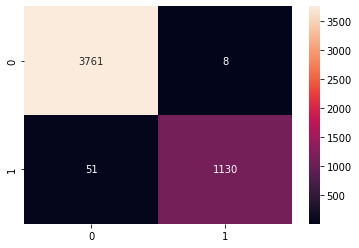

In [49]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, rf_pred)
sns.heatmap(confusion,annot=True,fmt='g')
plt.show()

In [51]:
rf.feature_importances_

array([0.31056874, 0.13473312, 0.1514235 , 0.15135112, 0.23980749,
       0.01031538, 0.00180065])

True


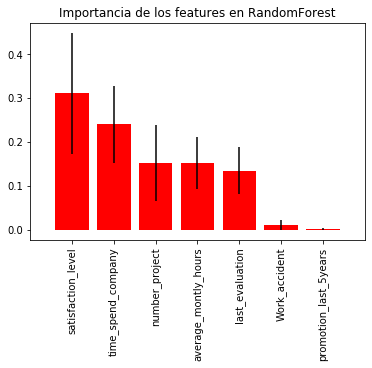

In [50]:
importancias = rf.feature_importances_
print (all(importancias == np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)))
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importancias)[::-1]
nombres_features = X.columns

# Graficar la importancia de los features en el random forest
plt.figure()
plt.title("Importancia de los features en RandomForest")
plt.bar(range(X.shape[1]), importancias[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), nombres_features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# 6: Clasificadores Ada Boost y Gradient Boosting



Recordemos: 

* La idea fundamental de los algoritmos basados en la noción de boosting era tratar de combinar muchos clasificadores débiles en un clasificador fuerte. 

* La principal diferencia con los métodos de Bagging era la forma en que se construye el ensamble: Boosting trata de mejorar la performance concentrándose de alguna forma en los casos con mayor error de entrenamiento.

### `AdaBoostClassifier()`

La idea central de AdaBoost es construir un ensamble de week learners y, en cada iteración ir incrementando el peso de los casos mal clasificados. La implementación den Scikit-Learn toma los siguientes parámetros:

* `base_estimator`: análogo al caso de `BaggingClassifier()`, el estimador sobre el cual se va a construir el ensamble. Por efecto, son árboles de decisión.
* `n_estimators`: el máximo de iteraciones
* `learning_rate`: el peso que va a tener la predicción de cada árbol en el ensamble final


### `GradientBoostingClassifier()`

Se trata de una generalización del algoritmo general de Boosting para cualquier tipo de función de pérdida diferenciable. En cada etapa, se fitea un árbol de decisión pero se realiza sobre los residuos del árbol anterior. Es decir, se busca corregir las estimaciones entrenando nuevos clasificadores sobre los "residuos" (la diferencia entre el valor observado y el valor predico ($y - \hat{y}$)

Los argumentos que toma como input son ya conocidos:

* `learning_rate`: el peso que va a tener la predicción de cada árbol en el ensamble final

* `n_estimators`: el máximo de iteraciones
* `criterion`: define el criterio de impureza para evaluar la calidad de las particiones
* `max_features`: la cantidad de features que extraerá para entrenar cada `base_estimator`. Por default es igual a `sqrt(X.shape[1])`
* `bootstrap` y `bootstrap_features`: controla si tanto los n_samples como las features son extraidos con reposición.
* `max_depth`: la pronfundidad máxima del árbol
* `min_samples_leaf`: el número mínimo de n_samples para constituir una hoja del árbol (nodo terminal)
* `min_samples_split`: el número mínimo de n_samples para realizar un split.

Utilizaremos como punto de partida el mismo código que utilizamos anteriormente:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
evaluar_rendimiento(ab, "AdaBoostClassifier")
evaluar_rendimiento(gb, "GradientBoostingClassifier")

### ¿Cuáles son los parámetros usados por defecto?

In [52]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## ¿Cómo haríamos para encontrar los hiperparámetros?

In [ ]:
c_a = [100, 200, 300]
m_x = ['sqrt',3,5]
modelos = []
for p in c_a:
    for p2 in m_x:
        
        rf = RandomForestClassifier(n_estimators=p, max_features=p2)
        rf.fit()
        modelos.append()

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [56]:
param_grid = {'max_depth': [3,5,8,10,20],
             'n_estimators': [100, 200, 300],
             'max_features': ['auto',3]}
grid = GridSearchCV(rf, param_grid=param_grid, cv=3, scoring='precision')

In [59]:
np.sqrt(X_train.shape[1])

2.6457513110645907

In [57]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 5, 8, 10],
                         'max_features': ['sqrt', 3],
                         'n_estimators': [100, 200, 300]},
             scoring='precision')

In [58]:
be_rf = grid.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=3,
                       n_estimators=300)

In [60]:
grid.best_estimator_.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)